In [1]:
### uncomment to display figures
# %matplotlib inline

# Demonstrates benchmarking functionality - SASMAS Soil Moisture

In [2]:
from awrams.benchmarking.benchmark import BenchmarkSoilMoisture
from awrams.utils import datetools as dt
import awrams.benchmarking.config as cfg

In [3]:
cfg.MONTHLY_REJECTION_THRESHOLD = 15

### change model soil moisture output variable names
#cfg.SM_MODEL_VARNAMES = ['s0', 'ss', 'sd']
#cfg.SM_MODEL_LAYERS = {'s0': 100., 'ss': 900., 'sd': 5000.}

In [4]:
cfg.SM_MODEL_VARNAMES

['s0_avg', 'ss_avg', 'sd_avg']

In [5]:
cfg.SM_MODEL_LAYERS

{'s0_avg': 100.0, 'sd_avg': 5000.0, 'ss_avg': 900.0}

## Set up comparison
soil moisture comparisons at SASMAS sites

In [6]:
sasmas_data_path = '../../test_data/benchmarking/sasmas/'
site_list = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
mod_site_list = ['SASMAS Soil moisture_' + site for site in site_list]

import awrams.benchmarking.meta.sasmas as sasmas

sas = BenchmarkSoilMoisture("SASMAS", "soil moisture", sasmas.meta)
sas.period = dt.dates('2003-2011')

sas.load(sasmas_data_path,mod_site_list,convert_units=100.)

In [7]:
sas.sites

['M3',
 'M7',
 'K6',
 'G1',
 'S7',
 'G4',
 'G5',
 'S4',
 'M6',
 'S5',
 'M4',
 'K2',
 'M2',
 'M1',
 'S3',
 'S1',
 'G2',
 'K5',
 'M5',
 'S6',
 'K1',
 'G6',
 'K4',
 'S2',
 'G3',
 'K3']

## Add models to the comparison
Any number of models can be simulataneously compared

In [8]:
path = sasmas_data_path+"/awral_${v}.csv"
sas.add_model("AWRAMSI.v4_0.AWRAL", csv_path=path)

## Plotting
Per-site timeseries and regression plots are available

In [9]:
sas.benchmark.top.selection

['AWRAMSI.v4_0.AWRAL']

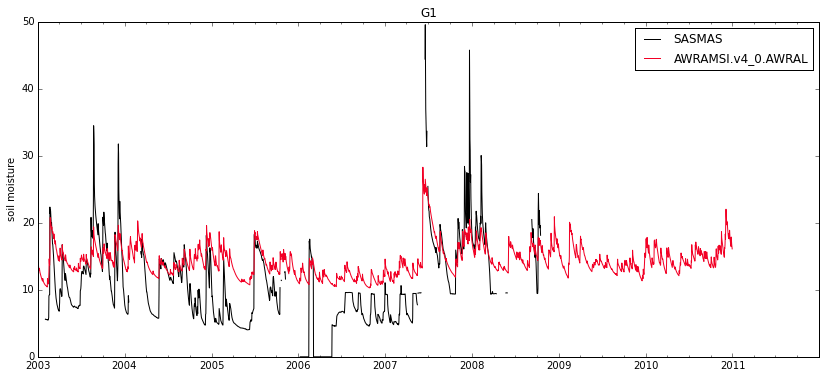

In [10]:
p = sas.benchmark.shallow.plot_timeseries('G1','raw')

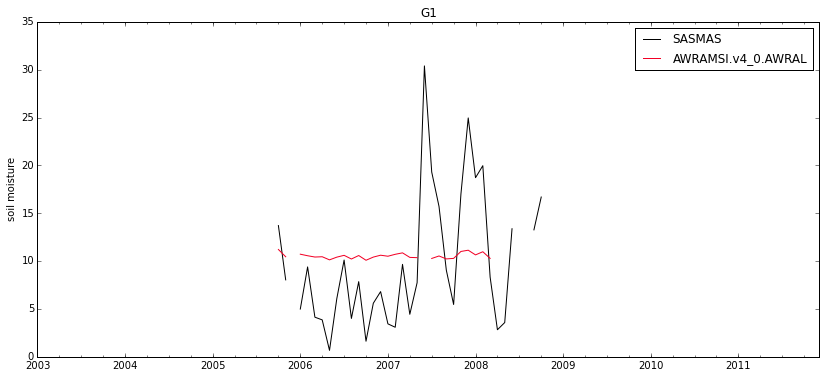

In [11]:
p = sas.benchmark.top.plot_timeseries('G1')

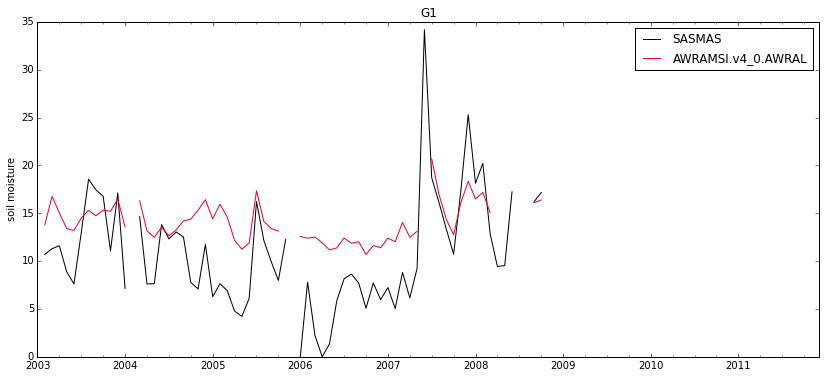

In [12]:
p = sas.benchmark.shallow.plot_timeseries('G1')

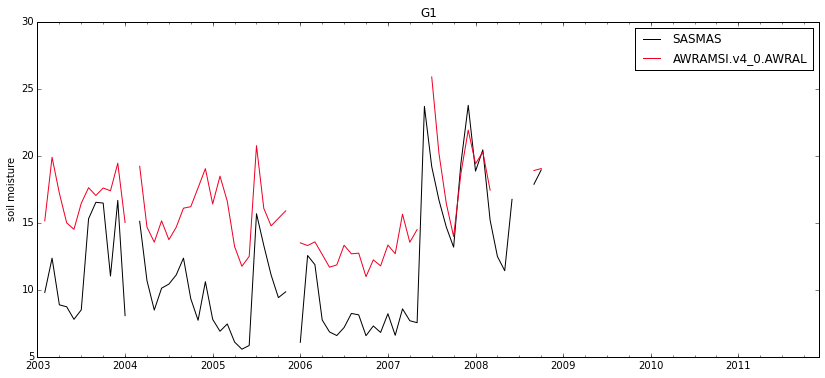

In [13]:
p = sas.benchmark.middle.plot_timeseries('G1')

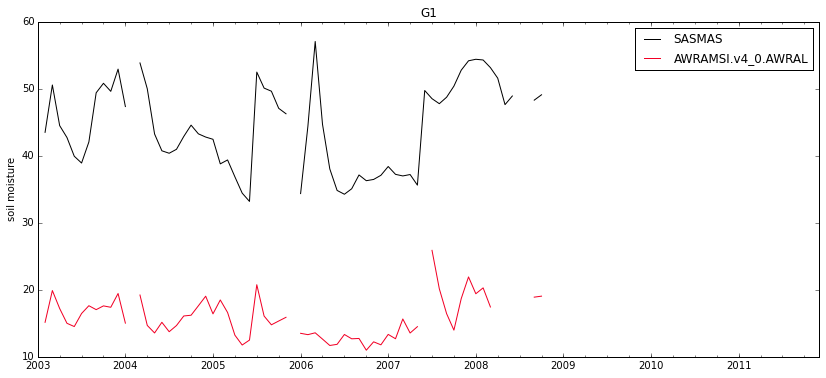

In [14]:
p = sas.benchmark.deep.plot_timeseries('G1')

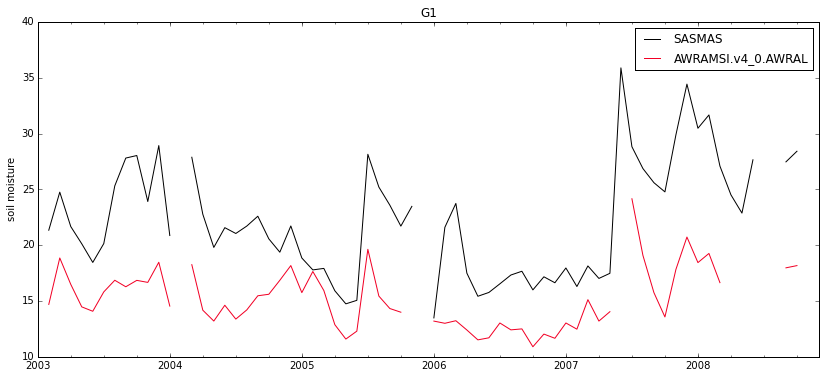

In [15]:
p = sas.benchmark.profile.plot_timeseries('G1')

## View some statistics
Summary percentiles can be printed out by specifying a statistic to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

In [16]:
sas.benchmark.deep.stat_percentiles('fobj',freq='m')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI.v4_0.AWRAL,-39.398391,-28.435483,-4.731511,-0.869553,0.005158,0.299603,0.34335


In [17]:
sas.benchmark.deep.stat_percentiles('grand_f',freq='m')

,grand_f
AWRAMSI.v4_0.AWRAL,-1.313139


In [18]:
sas.benchmark.top.stat_percentiles('bias')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI.v4_0.AWRAL,-17.503474,-9.185558,4.036401,6.053854,11.143789,19.667284,27.18927


In [19]:
sas.benchmark.shallow.stat_percentiles('nse','daily')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI.v4_0.AWRAL,-12.730108,-6.490648,-1.388102,-0.409241,0.14316,0.269795,0.342902


In [20]:
sas.benchmark.shallow.data_percentiles()

,0%,5%,25%,50%,75%,95%,100%
SASMAS,5.413336,6.130278,16.289034,19.863007,24.879052,38.378941,56.748702
AWRAMSI.v4_0.AWRAL,10.608583,12.696330,14.646505,29.108856,30.632489,34.203209,37.267603


## Stats plotting
As well as CDF and box-plots of the statistics

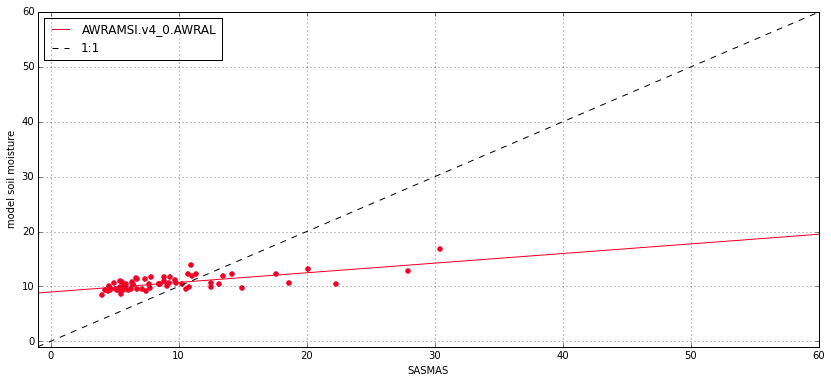

In [21]:
p = sas.benchmark.shallow.plot_regression('M1',xlim=[-1,60],ylim=[-1,60])

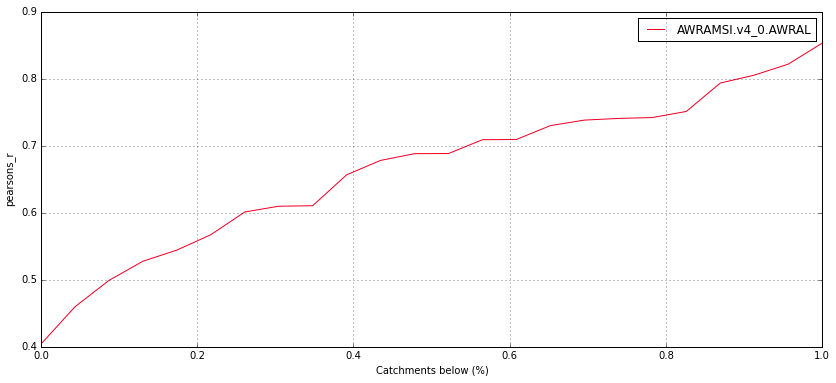

In [22]:
p = sas.benchmark.shallow.plot_cdf('pearsons_r')

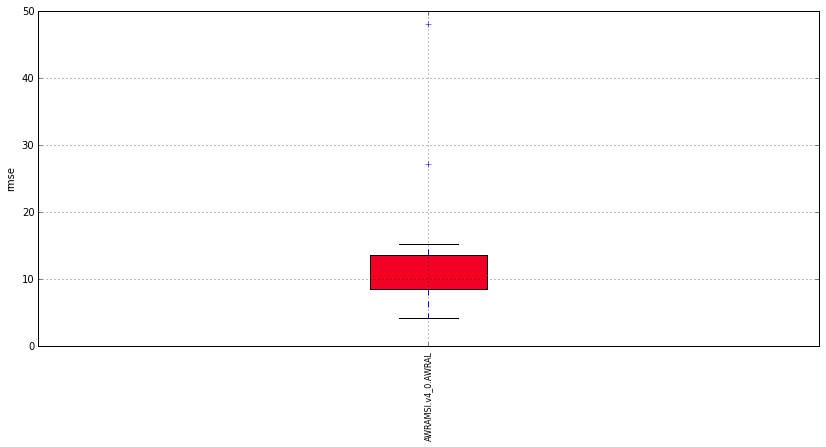

In [23]:
p = sas.benchmark.shallow.plot_box('rmse','daily')

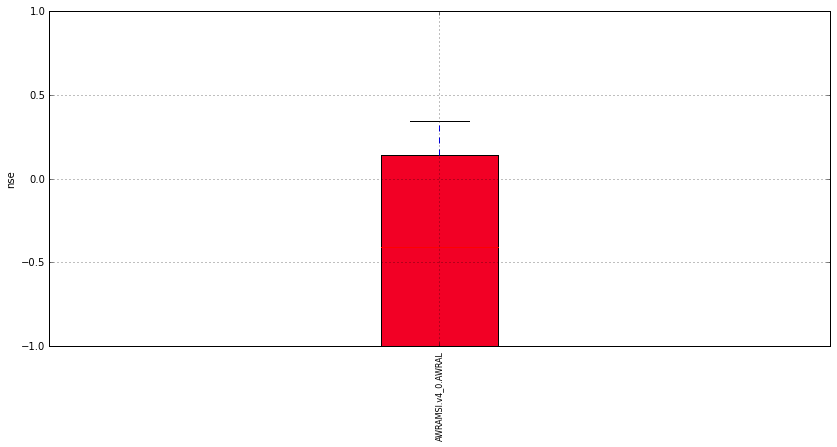

In [24]:
p = sas.benchmark.shallow.plot_box('nse','daily',ylim=[-1,1])